In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('Bird_Strikes.csv')


In [3]:
# Data Cleaning and Procesing

print(data.head())

   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight     FlightDate  \
0                             859         Engine Shut Down  11/23/00 0:00   
1                             424                      NaN   7/25/01 0:00   
2                            

In [4]:
data.head(2)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No


In [5]:
data.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [7]:
# check for missing values
print(data.isnull().sum())

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [8]:
data.rename(columns={'Record ID': 'record_id',
    'Aircraft: Type': 'aircraft_type',
    'Airport: Name': 'airport_name',
    'Altitude bin': 'altitude_bin',
    'Aircraft: Make/Model': 'aircraft_make_model',
    'Wildlife: Number struck': 'wildlife_number_struck',
    'Wildlife: Number Struck Actual': 'wildlife_number_struck_actual',
    'Effect: Impact to flight': 'effect_impact_to_flight',
    'FlightDate': 'incident_date',
    'Effect: Indicated Damage': 'effect_indicated_damage',
    'Aircraft: Number of engines?': 'aircraft_number_of_engines',
    'Aircraft: Airline/Operator': 'aircraft_airline_operator',
    'Origin State': 'origin_state',
    'When: Phase of flight': 'phase_of_flight',
    'Conditions: Precipitation': 'conditions_precipitation',
    'Remains of wildlife collected?': 'remains_of_wildlife_collected',
    'Remains of wildlife sent to Smithsonian': 'remains_sent_to_smithsonian',
    'Remarks': 'remarks',
    'Wildlife: Size': 'wildlife_size',
    'Conditions: Sky': 'conditions_sky',
    'Wildlife: Species': 'wildlife_species',
    'Pilot warned of birds or wildlife?': 'pilot_warned',
    'Cost: Total $': 'cost_total',
    'Feet above ground': 'altitude',
    'Number of people injured': 'people_injured',
    'Is Aircraft Large?': 'is_aircraft_large'},inplace=True)

In [9]:
data.columns[:-14]

Index(['record_id', 'aircraft_type', 'airport_name', 'altitude_bin',
       'aircraft_make_model', 'wildlife_number_struck',
       'wildlife_number_struck_actual', 'effect_impact_to_flight',
       'incident_date', 'effect_indicated_damage',
       'aircraft_number_of_engines', 'aircraft_airline_operator'],
      dtype='object')

In [10]:
# Convert incident_date to datetime
data['incident_date'] = pd.to_datetime(data['incident_date'],errors='coerce')

C:\Users\APPLE\AppData\Local\Temp\ipykernel_13736\3921154130.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['incident_date'] = pd.to_datetime(data['incident_date'],errors='coerce')


In [11]:
data.head(2)

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,incident_date,effect_indicated_damage,...,remains_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned,cost_total,altitude,people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No


In [12]:
#convert 'altitude' to numeric, coercing errors to NAN
data['altitude'] = pd.to_numeric(data['altitude'], errors='coerce')

In [13]:
data.head(5)

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,incident_date,effect_indicated_damage,...,remains_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned,cost_total,altitude,people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736",NaN,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [14]:
data['year'] = data['incident_date'].dt.year

In [15]:
data

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,incident_date,effect_indicated_damage,...,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned,cost_total,altitude,people_injured,is_aircraft_large,year
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736",NaN,0,Yes,2000.0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001.0
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No,2001.0
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes,2002.0
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,2011-12-30,No damage,...,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,NaN,0,No,2011.0
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,2011-12-30,No damage,...,NaN,Small,Some Cloud,Tree swallow,Y,0,0.0,0,No,2011.0
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaT,No damage,...,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,2011-12-31,No damage,...,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes,2011.0


# Visul Depicting the Number of Bird Strikes

In [17]:
# Number of Bird Strikes per year
yearly_bird_strikes = data['year'].value_counts().sort_index()
yearly_strikes = data.groupby('year').size()

In [18]:
yearly_bird_strikes

year
2000.0    1367
2001.0    1230
2002.0    1681
2003.0    1568
2004.0    1692
2005.0    1853
2006.0    2159
2007.0    2301
2008.0    2258
2009.0    3247
2010.0    3121
2011.0    2952
Name: count, dtype: int64

In [19]:
yearly_strikes

year
2000.0    1367
2001.0    1230
2002.0    1681
2003.0    1568
2004.0    1692
2005.0    1853
2006.0    2159
2007.0    2301
2008.0    2258
2009.0    3247
2010.0    3121
2011.0    2952
dtype: int64

In [20]:
 # save to output in csv yearly


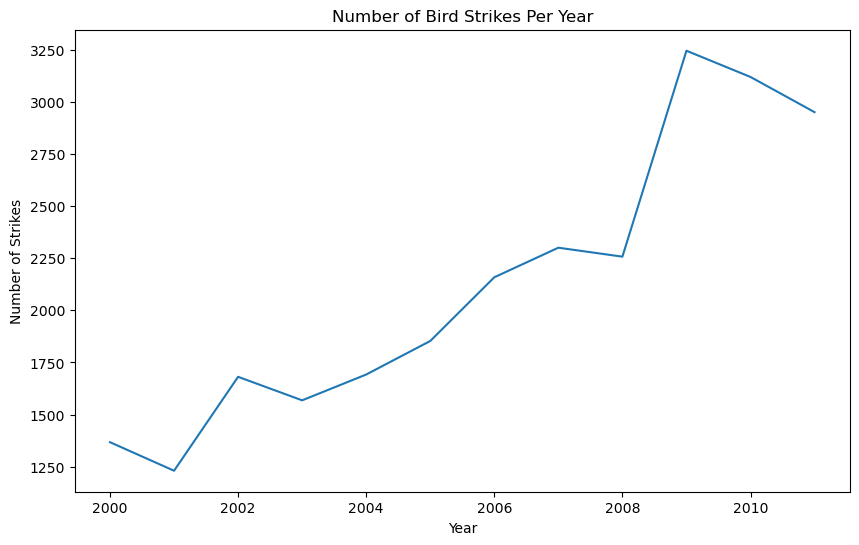

In [21]:
# Plot the number of bird strikes per year
plt.figure(figsize=(10, 6))
yearly_strikes.plot(kind='line')
plt.title('Number of Bird Strikes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.show()

In [22]:
#Monthly Bird Strikes
data['month'] = data['incident_date'].dt.month

In [23]:
data.head(1)

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,incident_date,effect_indicated_damage,...,wildlife_size,conditions_sky,wildlife_species,pilot_warned,cost_total,altitude,people_injured,is_aircraft_large,year,month
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,"30,736",NaN,0,Yes,2000.0,11.0


In [24]:
# count bird strikes per month
monthly_bird_strikes = data['month'].value_counts().sort_index()

In [25]:
monthly_bird_strikes

month
1.0      937
2.0      772
3.0     1233
4.0     1828
5.0     2318
6.0     2078
7.0     3278
8.0     3710
9.0     3417
10.0    3038
11.0    1801
12.0    1019
Name: count, dtype: int64

# Yearly Analysis & Bird Strikes in the US

C:\Users\APPLE\AppData\Local\Temp\ipykernel_13736\2674205443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_altitude_phase.values, y=avg_altitude_phase.index, palette='inferno')


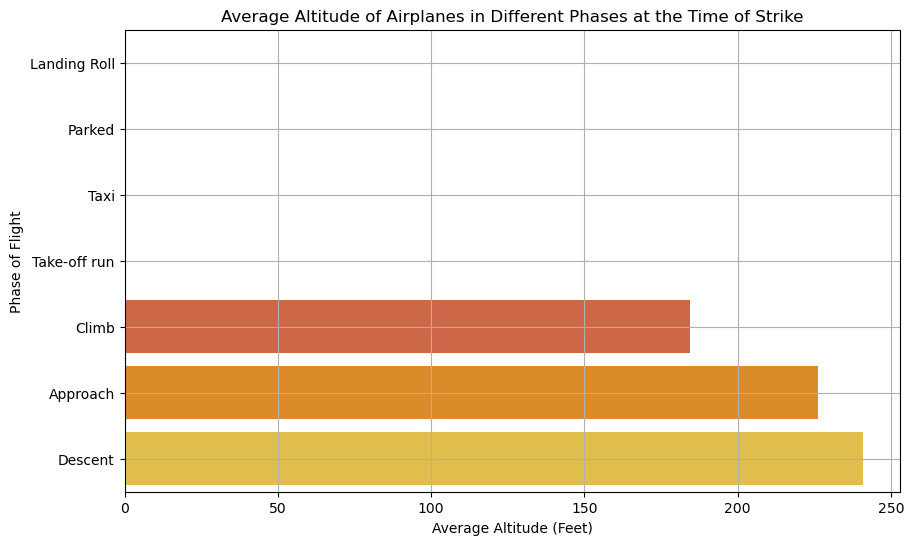

In [27]:
#Average Altitude of Airplanes in Different Phases at the Time of Strike
# Calculate average altitude for each phase of flight
avg_altitude_phase = data.groupby('phase_of_flight')['altitude'].mean().sort_values()

# Plot average altitude by phase of flight
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_altitude_phase.values, y=avg_altitude_phase.index, palette='inferno')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Strike')
plt.xlabel('Average Altitude (Feet)')
plt.ylabel('Phase of Flight')
plt.grid(True)
plt.show()


C:\Users\APPLE\AppData\Local\Temp\ipykernel_13736\510600587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_bird_strikes.values, y=airline_bird_strikes.index, palette='viridis')


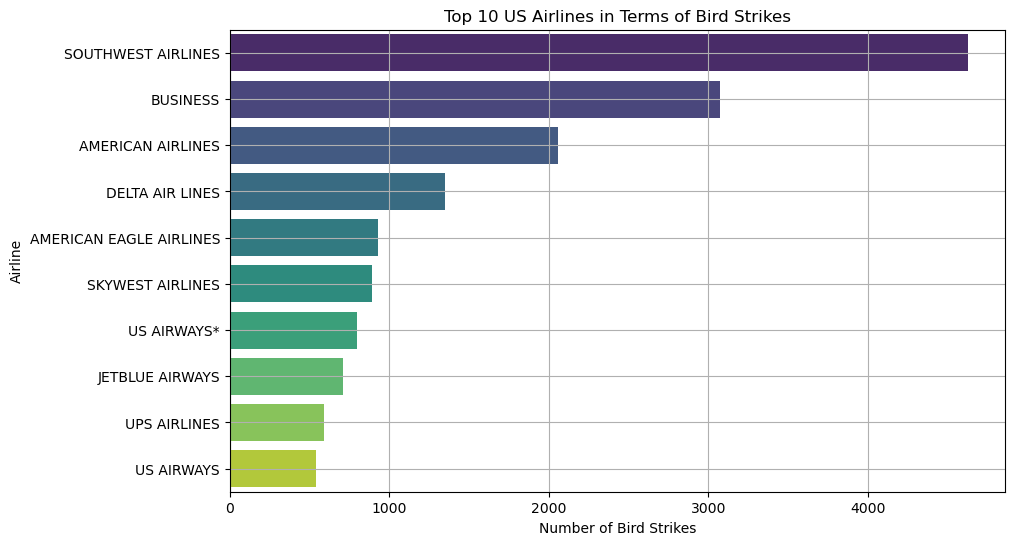

In [28]:
#Top 10 US Airlines in Terms of Bird Strikes
# Count bird strikes per airline
airline_bird_strikes = data['aircraft_airline_operator'].value_counts().head(10)

# Plot top 10 airlines with bird strikes
plt.figure(figsize=(10, 6))
sns.barplot(x=airline_bird_strikes.values, y=airline_bird_strikes.index, palette='viridis')
plt.title('Top 10 US Airlines in Terms of Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')
plt.grid(True)
plt.show()


C:\Users\APPLE\AppData\Local\Temp\ipykernel_13736\682762316.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_bird_strikes.values, y=airport_bird_strikes.index, palette='plasma')


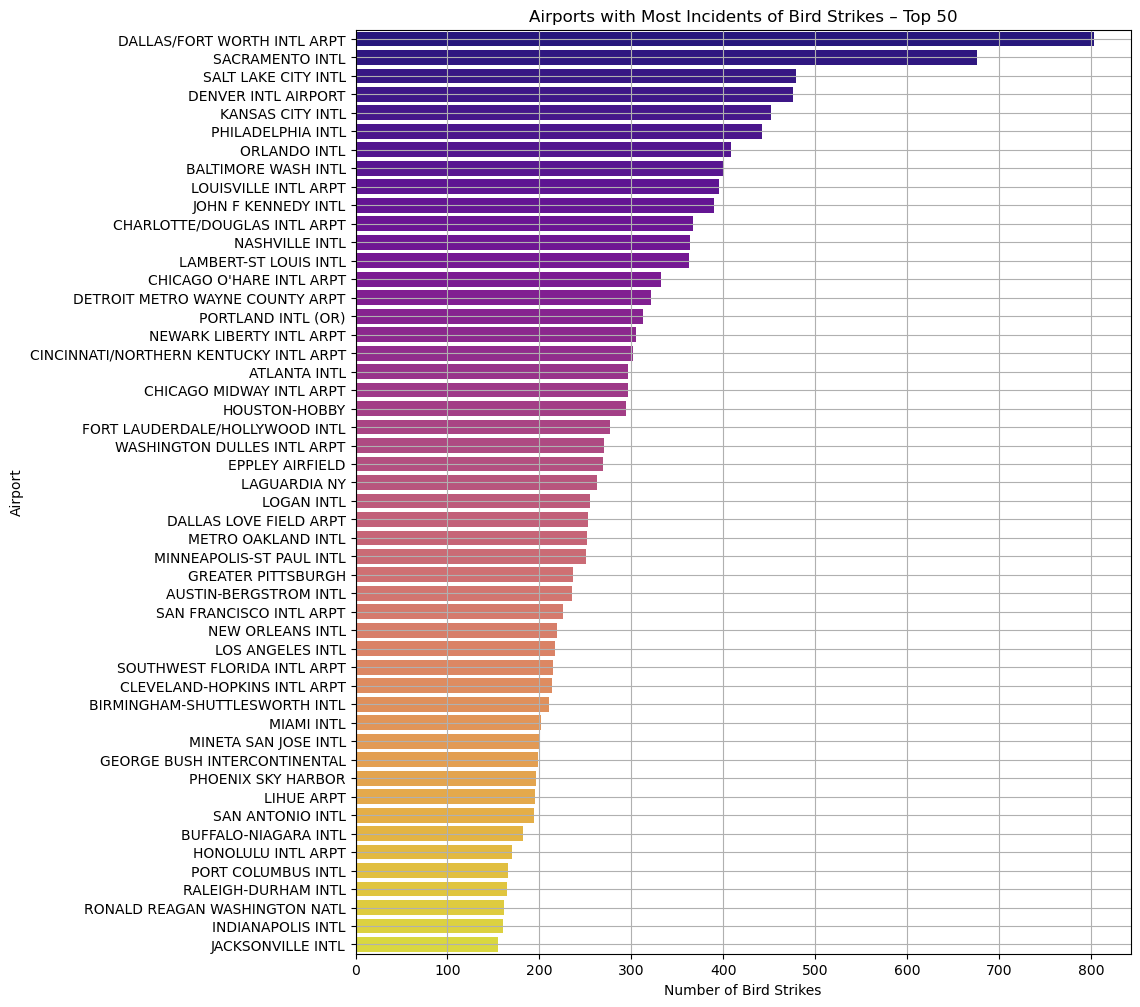

In [29]:
#  Airports with Most Incidents of Bird Strikes – Top 50
# Count bird strikes per airport
airport_bird_strikes = data['airport_name'].value_counts().head(50)

# Plot top 50 airports with bird strikes
plt.figure(figsize=(10, 12))
sns.barplot(x=airport_bird_strikes.values, y=airport_bird_strikes.index, palette='plasma')
plt.title('Airports with Most Incidents of Bird Strikes – Top 50')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.grid(True)
plt.show()


In [30]:
# Save Plots 
plt.savefig('yearly_bird_strikes.png')
plt.savefig('monthly_bird_strikes.png')
plt.savefig('avg_altitude_phase.png')
plt.savefig('top_10_airlines_bird_strikes.png')
plt.savefig('top_50_airports_bird_strikes.png')


<Figure size 640x480 with 0 Axes>

In [31]:
data.to_csv('Bird_Strikes_cleaned.csv', index=False)

# visulazation

# Visuals Ddpicting the Number of Bird Strikes

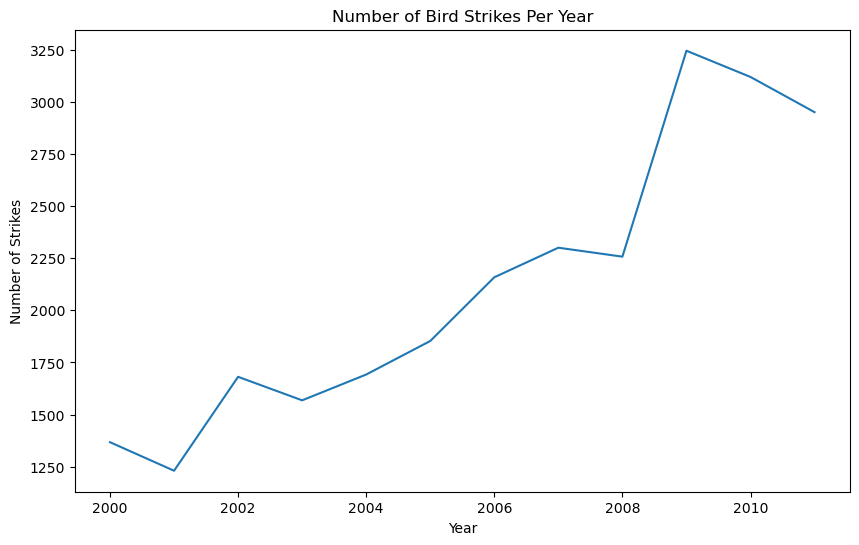

In [34]:
# EDA Exploratory  Data Analysis
# 1. Visuals Ddpicting the Number of Bird Strikes

# Group by year and count the number of bird strikes
yearly_strikes = data.groupby('year').size()

# Plot the number of bird strikes per year
plt.figure(figsize=(10, 6))
yearly_strikes.plot(kind='line')
plt.title('Number of Bird Strikes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.show()

In [35]:
yearly_strikes.to_csv('Visuals Ddpicting the Number of Bird Strikes.csv',index=False)

# Yearly Analysis & Bird Strikes in the US

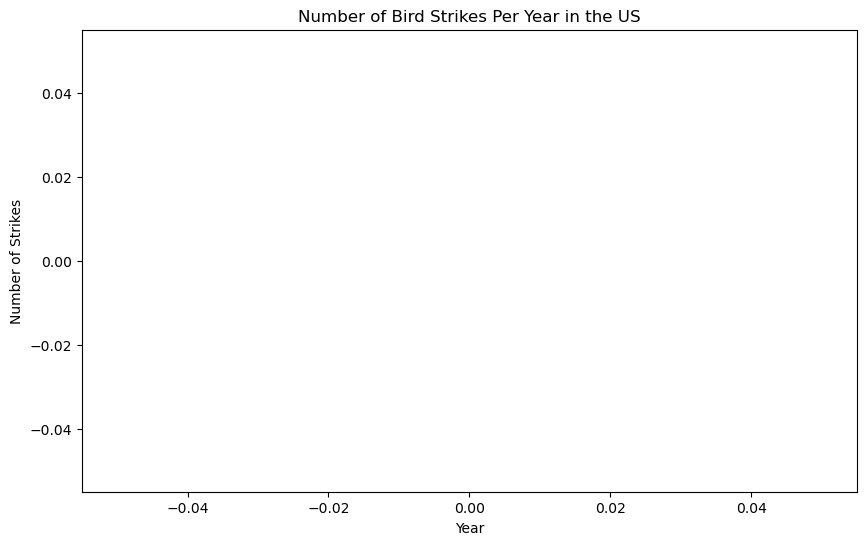

In [37]:
# 2. Yearly Analysis & Bird Strikes in the US
# Assuming the data contains a 'country' column
us_strikes = data[data['origin_state'] == 'US']

# Group by year and count the number of bird strikes in the US
us_yearly_strikes = us_strikes.groupby('year').size()

# Plot the number of bird strikes per year in the US
plt.figure(figsize=(10, 6))
us_yearly_strikes.plot(kind='line')
plt.title('Number of Bird Strikes Per Year in the US')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.show()

In [38]:
us_yearly_strikes

Series([], dtype: int64)

In [39]:
us_yearly_strikes.to_csv('Yearly Analysis & Bird Strikes in the US.csv',index=False)

# Top 10 US Airlines in Terms of Having Encountered Bird Strikes

C:\Users\APPLE\AppData\Local\Temp\ipykernel_13736\3650058551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_bird_strikes.values, y=airline_bird_strikes.index, palette='viridis')


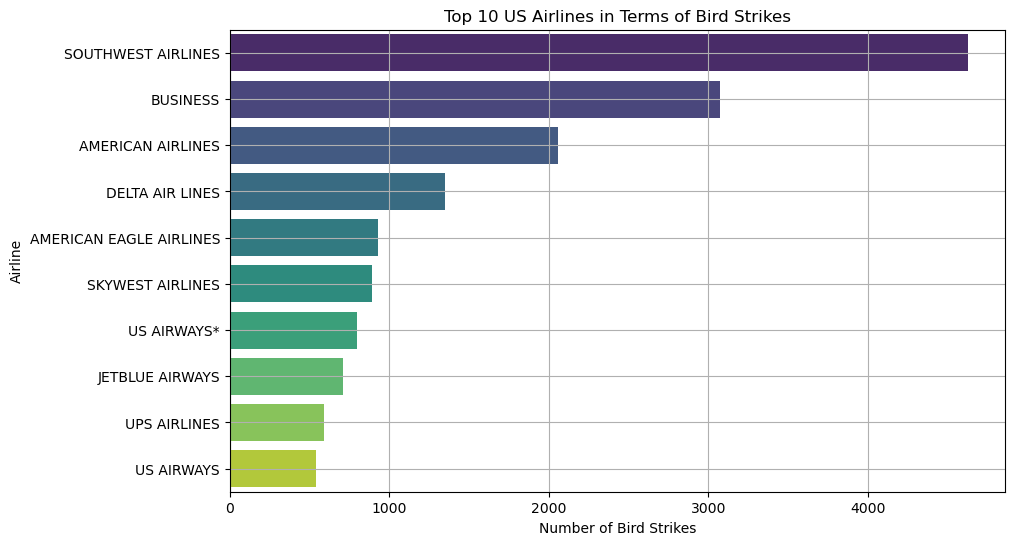

In [41]:
#3.Top 10 US Airlines in Terms of Having Encountered Bird Strikes
airline_bird_strikes = data['aircraft_airline_operator'].value_counts().head(10)

# Plot top 10 airlines with bird strikes
plt.figure(figsize=(10, 6))
sns.barplot(x=airline_bird_strikes.values, y=airline_bird_strikes.index, palette='viridis')
plt.title('Top 10 US Airlines in Terms of Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')
plt.grid(True)
plt.show()

In [42]:
airline_bird_strikes.to_csv('Top 10 US Airlines in Terms of Having Encountered Bird Strikes.csv',index=False)

#  Airports with Most Incidents of Bird Strikes – Top 50

C:\Users\APPLE\AppData\Local\Temp\ipykernel_13736\373043202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_bird_strikes.values, y=airport_bird_strikes.index, palette='plasma')


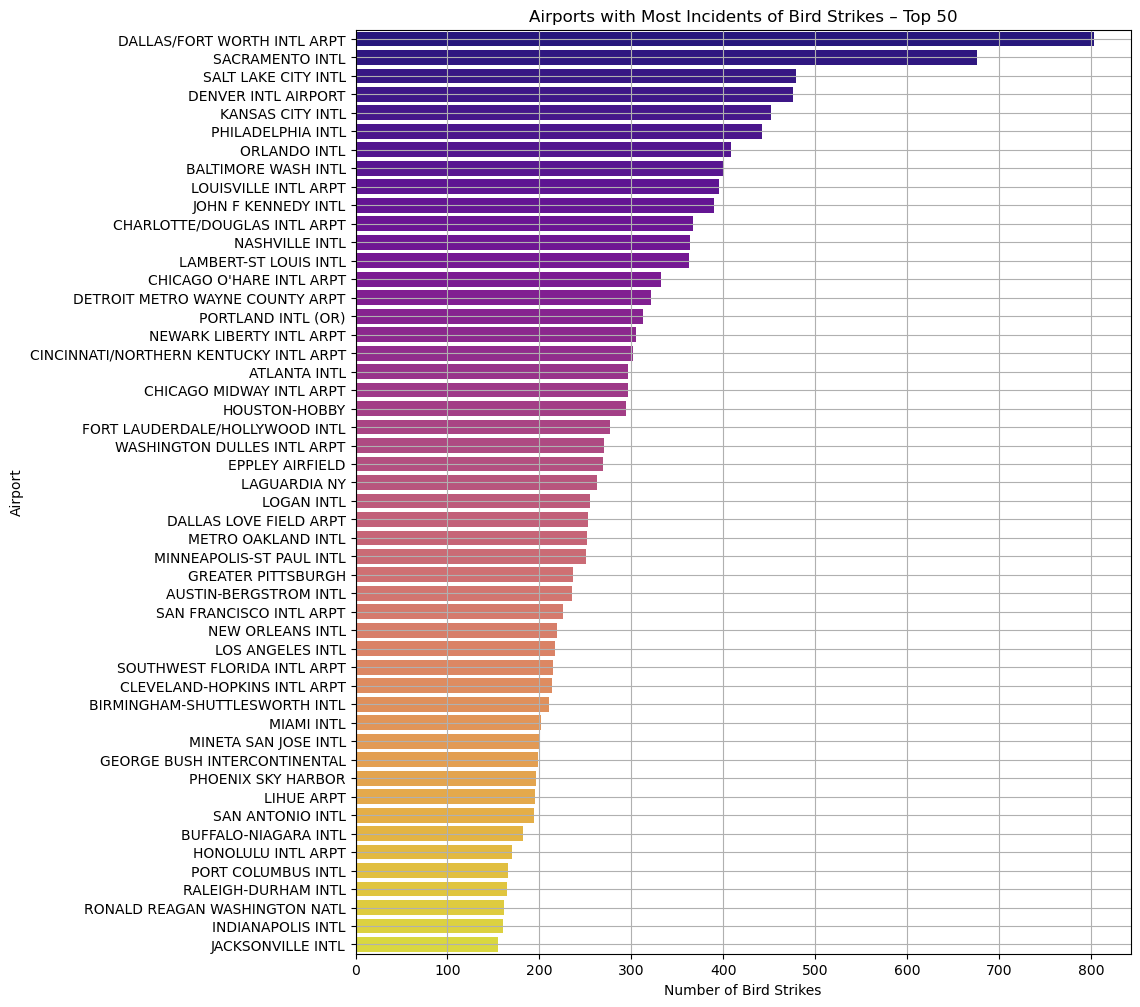

In [44]:
# Airports with Most Incidents of Bird Strikes – Top 50
#  Airports with Most Incidents of Bird Strikes – Top 50
# Count bird strikes per airport
airport_bird_strikes = data['airport_name'].value_counts().head(50)

# Plot top 50 airports with bird strikes
plt.figure(figsize=(10, 12))
sns.barplot(x=airport_bird_strikes.values, y=airport_bird_strikes.index, palette='plasma')
plt.title('Airports with Most Incidents of Bird Strikes – Top 50')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.grid(True)
plt.show()

In [45]:
airport_bird_strikes.to_csv('Airports with Most Incidents of Bird Strikes – Top 50.csv',index=False)

# Yearly Cost Incurred due to Bird Strikes

In [47]:
# convert cost_total column to numeric
data['cost_total'] = pd.to_numeric(data['cost_total'], errors='coerce')

In [48]:
data.head(3)

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,incident_date,effect_indicated_damage,...,wildlife_size,conditions_sky,wildlife_species,pilot_warned,cost_total,altitude,people_injured,is_aircraft_large,year,month
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Medium,No Cloud,Unknown bird - medium,N,NaN,NaN,0,Yes,2000.0,11.0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,Small,Some Cloud,Rock pigeon,Y,0.0,0.0,0,No,2001.0,7.0
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,Small,No Cloud,European starling,N,0.0,50.0,0,No,2001.0,9.0


In [49]:
# Calculate yearly cost incurred due to bird strikes
yearly_cost = data.groupby('year')['cost_total'].sum().reset_index()


In [50]:
yearly_cost.to_csv('Yearly Cost Incurred due to Bird Strikes.csv',index=False)

C:\Users\APPLE\AppData\Local\Temp\ipykernel_13736\1600421348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='cost_total', data=yearly_cost, palette='viridis')


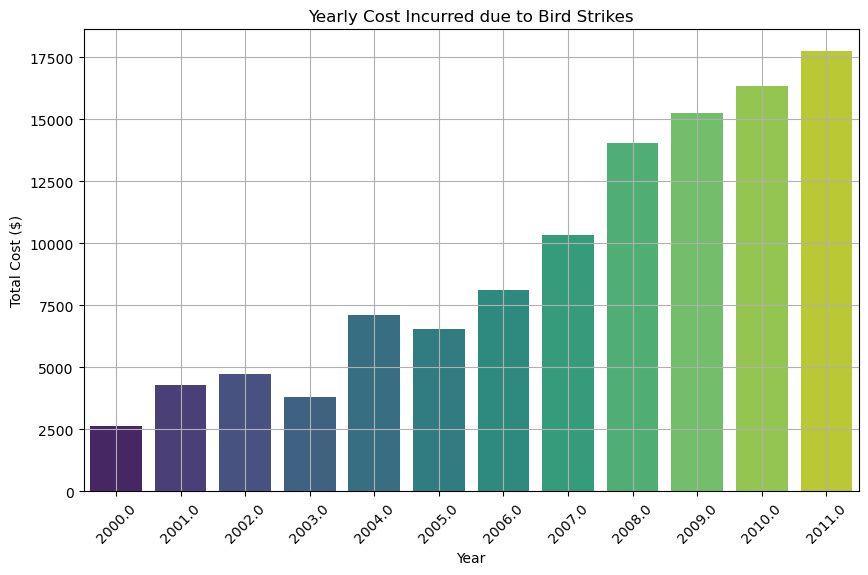

In [51]:
# Plotting the yearly cost incurred due to bird strikes
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='cost_total', data=yearly_cost, palette='viridis')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# When Do Most Bird Strikes Occur?

In [53]:
# extract month and hr from incident date
data['month'] = data['incident_date'].dt.month
data['hour']= data['incident_date'].dt.hour

In [54]:
data.head(1)
          

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,incident_date,effect_indicated_damage,...,conditions_sky,wildlife_species,pilot_warned,cost_total,altitude,people_injured,is_aircraft_large,year,month,hour
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,No Cloud,Unknown bird - medium,N,NaN,NaN,0,Yes,2000.0,11.0,0.0


In [55]:
# group by month and count the number of bird strikes
monthly_strikes = data.groupby('month').size()

In [56]:
monthly_strikes.to_csv('When Do Most Bird Strikes Occur_month.csv',index=False)

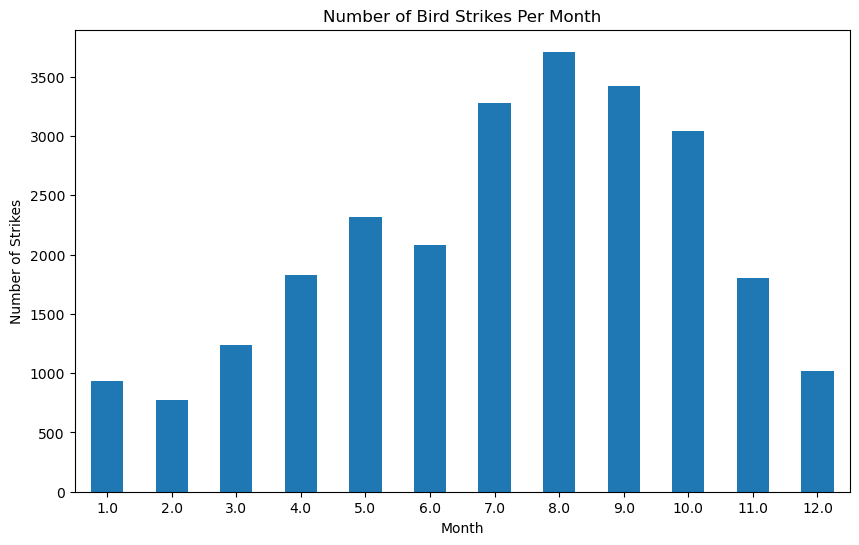

In [57]:
# Plot the number of bird strikes per month
plt.figure(figsize=(10, 6))
monthly_strikes.plot(kind='bar')
plt.title('Number of Bird Strikes Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=0)
plt.show()

In [58]:
# group by hour and count the number of bird strikes
hourly_strikes = data.groupby('hour').size()

In [59]:
hourly_strikes.to_csv('When Do Most Bird Strikes Occur_hourly.csv',index=False)

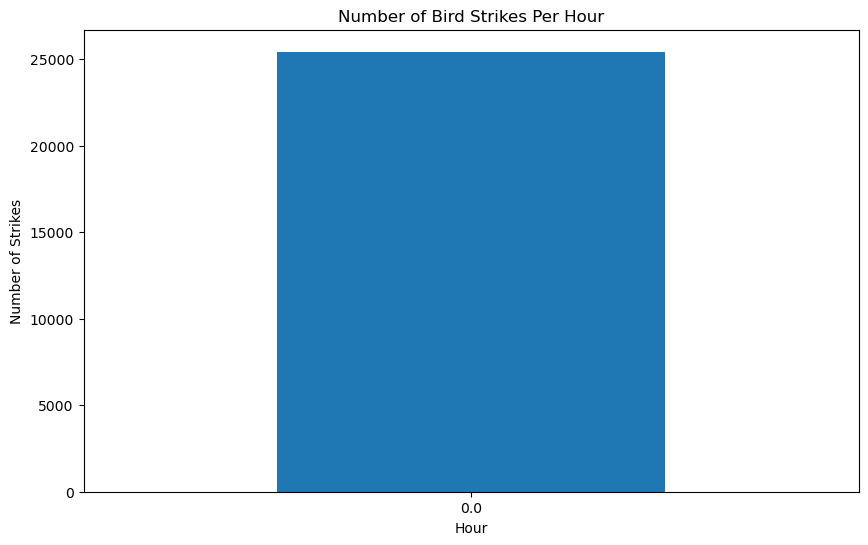

In [60]:

# Plot the number of bird strikes per hour
plt.figure(figsize=(10, 6))
hourly_strikes.plot(kind='bar')
plt.title('Number of Bird Strikes Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=0)
plt.show()

# Altitude of Aeroplanes at the Time of Strike

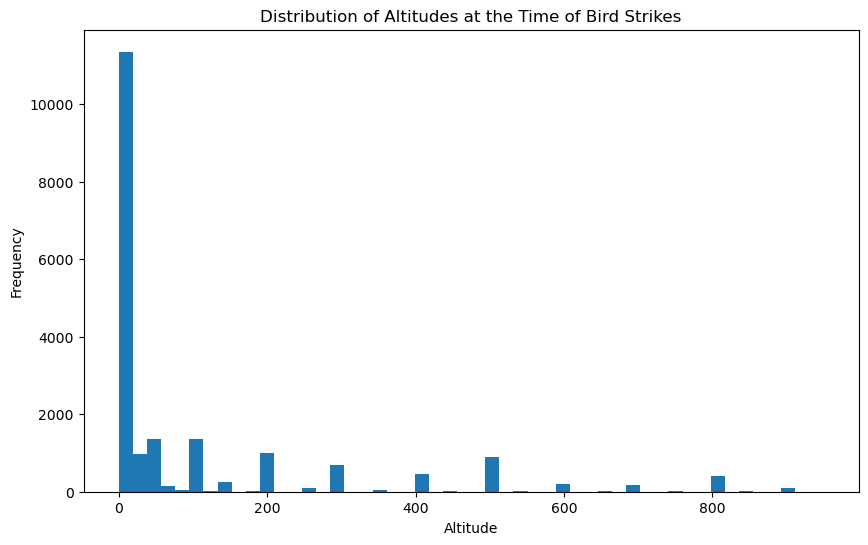

In [62]:
plt.figure(figsize=(10, 6))
data['altitude'].plot(kind='hist', bins=50)
plt.title('Distribution of Altitudes at the Time of Bird Strikes')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.show()

# Phase of Flight at the Time of the Strike

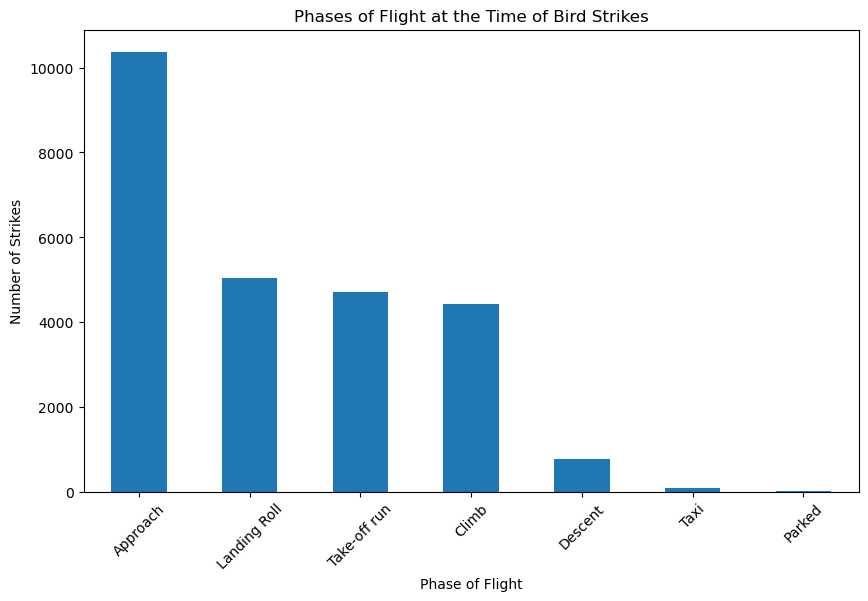

In [64]:
plt.figure(figsize=(10, 6))
data['phase_of_flight'].value_counts().plot(kind='bar')
plt.title('Phases of Flight at the Time of Bird Strikes')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)
plt.show()

# Average Altitude of Aeroplanes in Different Phases at the Time of Strike

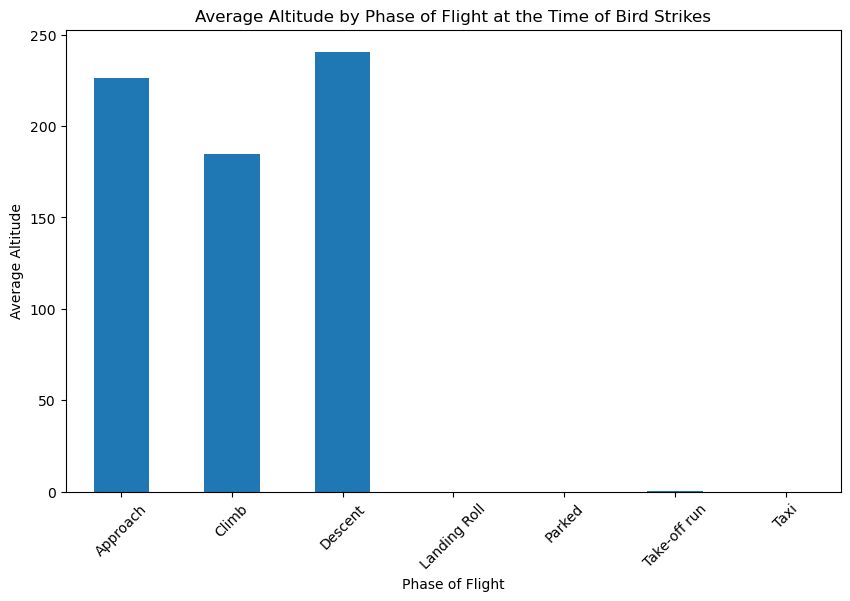

In [66]:
# Calculate the average altitude for each phase of flight
avg_altitude_by_phase = data.groupby('phase_of_flight')['altitude'].mean()

# Plot the average altitude by phase of flight
plt.figure(figsize=(10, 6))
avg_altitude_by_phase.plot(kind='bar')
plt.title('Average Altitude by Phase of Flight at the Time of Bird Strikes')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude')
plt.xticks(rotation=45)
plt.show()

In [67]:
avg_altitude_by_phase.to_csv('Average Altitude of Aeroplanes in Different Phases at the Time of Strike¶.csv',index=False)

#  Effect of Bird Strikes & Impact on Flight

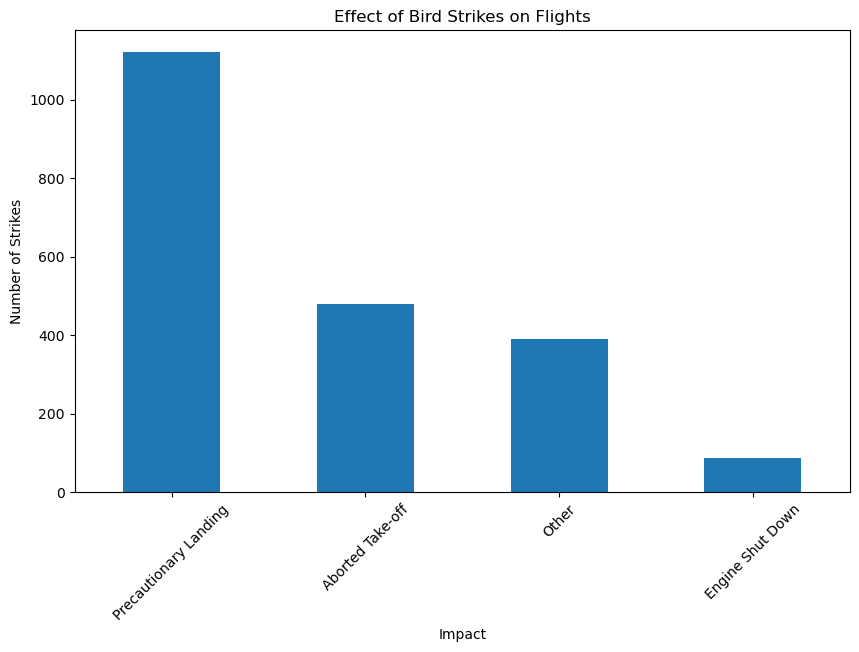

In [69]:
# Plot the distribution of impact types
plt.figure(figsize=(10, 6))
data['effect_impact_to_flight'].value_counts().plot(kind='bar')
plt.title('Effect of Bird Strikes on Flights')
plt.xlabel('Impact')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)
plt.show()

# Effect of Strike at Different Altitudes

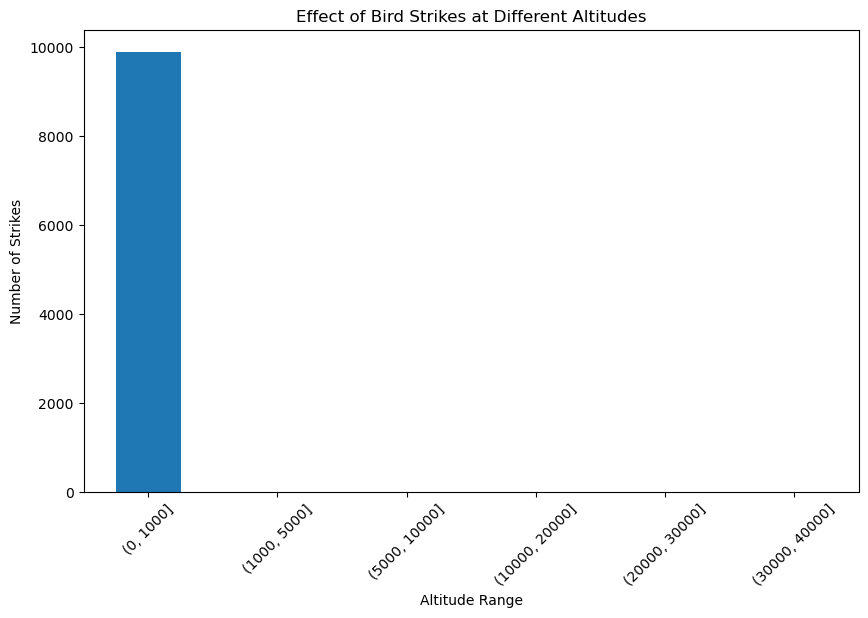

In [71]:
# Calculate the number of strikes by altitude range
altitude_bins = [0, 1000, 5000, 10000, 20000, 30000, 40000]
data['altitude_range'] = pd.cut(data['altitude'], bins=altitude_bins)

# Plot the number of strikes by altitude range
plt.figure(figsize=(10, 6))
data['altitude_range'].value_counts().sort_index().plot(kind='bar')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Altitude Range')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)
plt.show()

#  Were Pilots Informed? & Prior Warning and Effect of Strike Relation


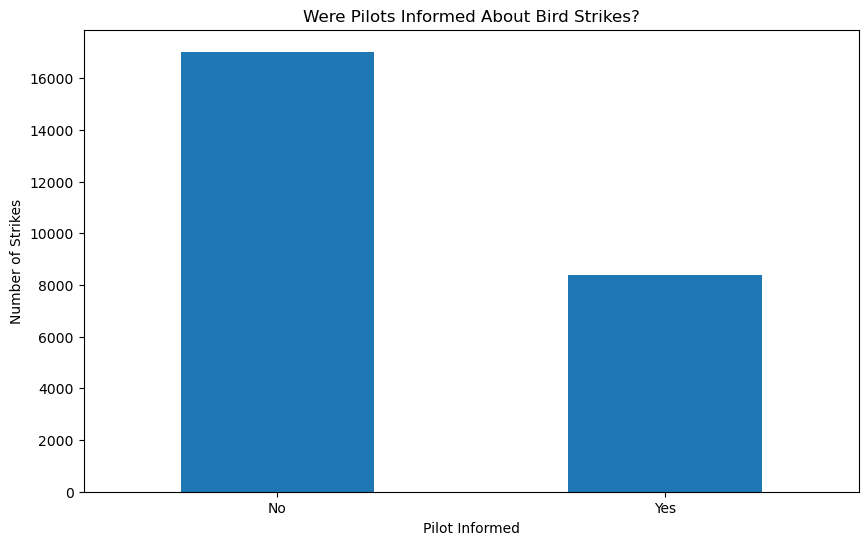

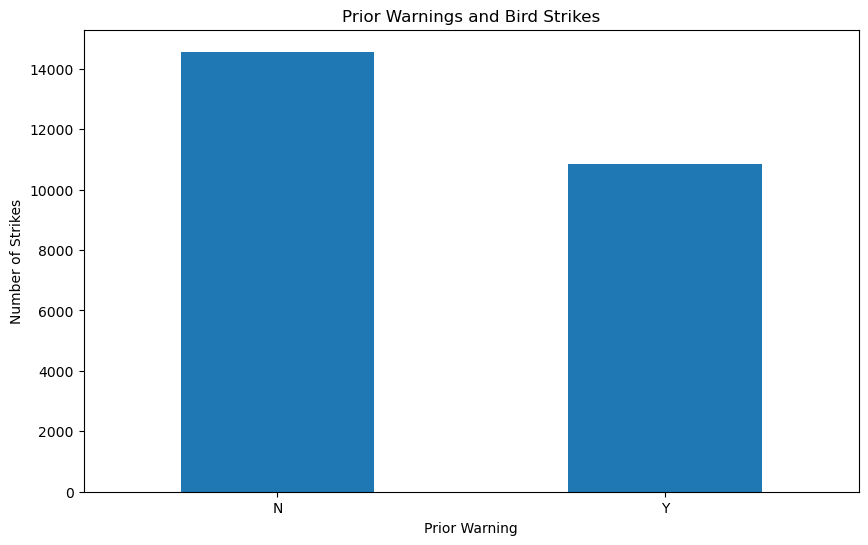

In [73]:
# Assuming the data contains a 'pilot_informed' column indicating whether pilots were informed
# Plot the distribution of strikes based on whether pilots were informed
plt.figure(figsize=(10, 6))
data['is_aircraft_large'].value_counts().plot(kind='bar')
plt.title('Were Pilots Informed About Bird Strikes?')
plt.xlabel('Pilot Informed')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=0)
plt.show()

# Assuming the data contains a 'prior_warning' column indicating whether there was a prior warning
# Plot the distribution of strikes based on prior warnings
plt.figure(figsize=(10, 6))
data['pilot_warned'].value_counts().plot(kind='bar')
plt.title('Prior Warnings and Bird Strikes')
plt.xlabel('Prior Warning')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=0)
plt.show()

In [74]:
data

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,incident_date,effect_indicated_damage,...,wildlife_species,pilot_warned,cost_total,altitude,people_injured,is_aircraft_large,year,month,hour,altitude_range
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,Unknown bird - medium,N,NaN,NaN,0,Yes,2000.0,11.0,0.0,NaN
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,Rock pigeon,Y,0.0,0.0,0,No,2001.0,7.0,0.0,NaN
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,European starling,N,0.0,50.0,0,No,2001.0,9.0,0.0,"(0.0, 1000.0]"
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,European starling,Y,0.0,50.0,0,Yes,2002.0,9.0,0.0,"(0.0, 1000.0]"
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,European starling,N,0.0,50.0,0,No,2003.0,6.0,0.0,"(0.0, 1000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,2011-12-30,No damage,...,Unknown bird - large,N,0.0,NaN,0,No,2011.0,12.0,0.0,NaN
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,2011-12-30,No damage,...,Tree swallow,Y,0.0,0.0,0,No,2011.0,12.0,0.0,NaN
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaT,No damage,...,Unknown bird - small,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,2011-12-31,No damage,...,Unknown bird - medium,Y,0.0,0.0,0,Yes,2011.0,12.0,0.0,NaN


In [75]:
data.to_csv('cleaned_analsis_file.csv',index=False)

In [76]:
data['aircraft_number_of_engines']

0          2
1          2
2          2
3          2
4          2
        ... 
25553      2
25554      2
25555    NaN
25556      2
25557      2
Name: aircraft_number_of_engines, Length: 25558, dtype: object

In [77]:
data['cost_total']

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25553    0.0
25554    0.0
25555    0.0
25556    0.0
25557    0.0
Name: cost_total, Length: 25558, dtype: float64